In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error 

Load the dataset from a csv file. This csv file has five features (PCB dielectric thickness(h), dielectric constant(er1), trace lower width(w1), trace upper width(w2) and thickness(t)), which determined the PCB trace impedance Zo. The sweeping features are H1, Er1. 

In [2]:
data = pd.read_csv('MicroStrip_Training_H_ER.csv')
data

,H1,Er1,W1,W2,T1,Zo
0,2.0,3.0,4,3.5,0.7,54.1491
1,2.1,3.0,4,3.5,0.7,55.7520
2,2.2,3.0,4,3.5,0.7,57.2776
3,2.3,3.0,4,3.5,0.7,58.7739
4,2.4,3.0,4,3.5,0.7,60.2150
...,...,...,...,...,...,...
1436,14.6,5.0,4,3.5,0.7,106.1021
1437,14.7,5.0,4,3.5,0.7,106.3336
1438,14.8,5.0,4,3.5,0.7,106.5678
1439,14.9,5.0,4,3.5,0.7,106.7964


Because the sweeping features are only H1, Er1. So just make H1 and Er1 as the training featuers.

In [3]:
df = data.drop(columns = ['W1', 'W2', 'T1'])
df

,H1,Er1,Zo
0,2.0,3.0,54.1491
1,2.1,3.0,55.7520
2,2.2,3.0,57.2776
3,2.3,3.0,58.7739
4,2.4,3.0,60.2150
...,...,...,...
1436,14.6,5.0,106.1021
1437,14.7,5.0,106.3336
1438,14.8,5.0,106.5678
1439,14.9,5.0,106.7964


We can plot the relationship between H1 and Zo, Er1 and Zo

In [4]:
import matplotlib.pyplot as plt
import numpy as np

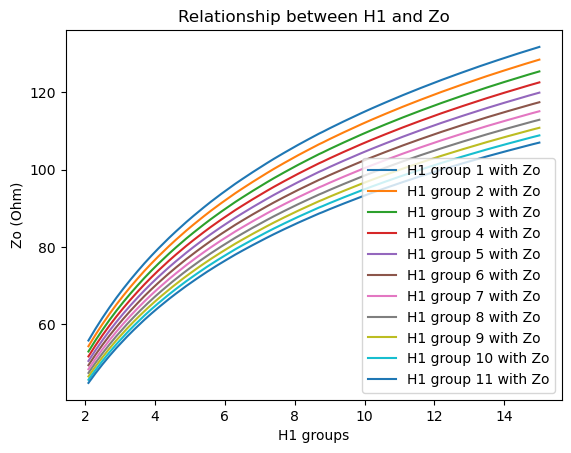

In [15]:
# The thickness H1 was swept from 2 mm to 15 mm for 11 times. For each sweep, We can plot the relationship between H1 and Zo 
for i in range(11):
    plt.plot(df['H1'][(131*i+1):(131*(i+1))], df['Zo'][(131*i+1):(131*(i+1))], label=f'H1 group {i+1} with Zo')

plt.legend()
plt.xlabel('H1 groups')
plt.ylabel('Zo (Ohm)')
plt.title('Relationship between H1 and Zo')
plt.show()

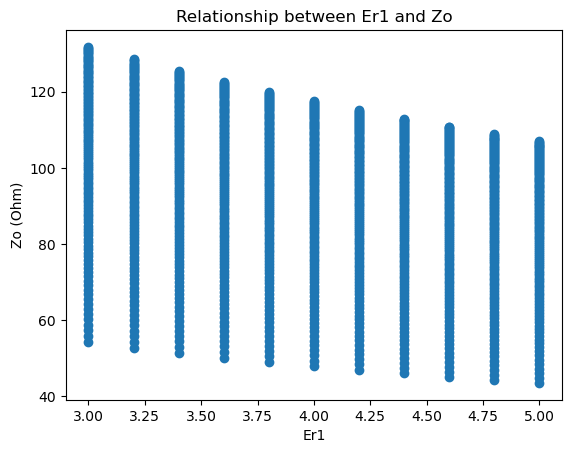

In [18]:
#Plot the relationship between feature Er1 and output Zo. It showed the impedance Zo related with thickness H1,
#And Zo becomes smaller when Er1 increased.

plt.scatter(df['Er1'], df['Zo'])
plt.xlabel('Er1')
plt.ylabel('Zo (Ohm)')
plt.title('Relationship between Er1 and Zo')
plt.show()

Create the training data and test data

In [20]:
X = df[['H1', 'Er1']]
y = df['Zo']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.1)

Build the pipeline with the Polynomial transformer, degree = 3, trained the model.

In [22]:
pipe = Pipeline([('transformer', PolynomialFeatures(degree=3)), 
                ('regression', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer', PolynomialFeatures(degree=3)),
                ('regression', LinearRegression())])

This simple model can get very high score and the mean_squarred_error is also very smal.

In [23]:
pipe.score(X_test, y_test)

0.9996570604177024

In [24]:
mean_squared_error(pipe.predict(X_test), y_test) 

0.10204688218224298

We can plot the predicted impedance compared to the real impedance, for the frist 10 samples.

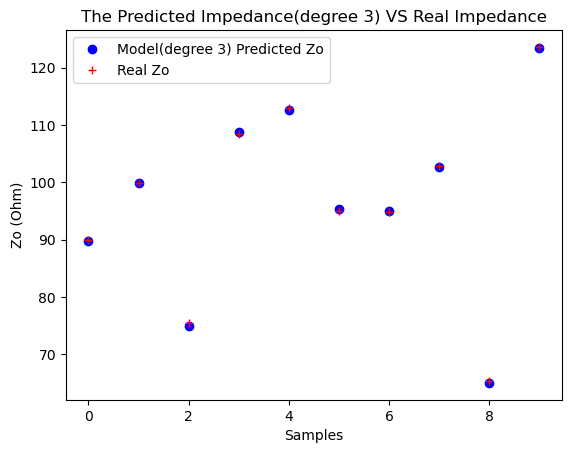

In [35]:
plt.plot(pipe.predict(X_test)[0:10], 'bo', label = 'Model(degree 3) Predicted Zo')
plt.plot(y_test.to_numpy()[0:10], 'r+', label = 'Real Zo')
plt.xlabel('Samples')
plt.ylabel('Zo (Ohm)')
plt.title('The Predicted Impedance(degree 3) VS Real Impedance')
plt.legend()
plt.show()

Also tried 5 order Polynomial transfermer, the score is even higher and the mean squared error becomes very small.

In [36]:
pipe = Pipeline([('transformer', PolynomialFeatures(degree=5)), 
                ('regression', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer', PolynomialFeatures(degree=5)),
                ('regression', LinearRegression())])

In [37]:
pipe.score(X_test, y_test)

0.9999959038586536

In [38]:
mean_squared_error(pipe.predict(X_test), y_test) 

0.0012188690806139981

Similarly, we can plot the predicted impedance compared to the real impedance, for the frist 10 samples.

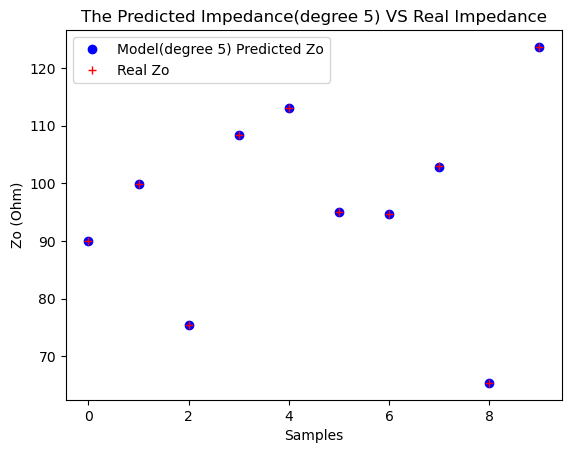

In [39]:
plt.plot(pipe.predict(X_test)[0:10], 'bo', label = 'Model(degree 5) Predicted Zo')
plt.plot(y_test.to_numpy()[0:10], 'r+', label = 'Real Zo')
plt.xlabel('Samples')
plt.ylabel('Zo (Ohm)')
plt.title('The Predicted Impedance(degree 5) VS Real Impedance')
plt.legend()
plt.show()

So, order 5 Polynomial features are a very good model to predict the trace impedance.

We can also apply other model to try its performance. I tried DecisionTreeRegression as follows, with max_depth=5 and max_depth=10.

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
regr = DecisionTreeRegressor(criterion='squared_error', max_depth = 5)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9641611894836478

In [53]:
mean_squared_error(regr.predict(X_test), y_test) 

10.664382483384422

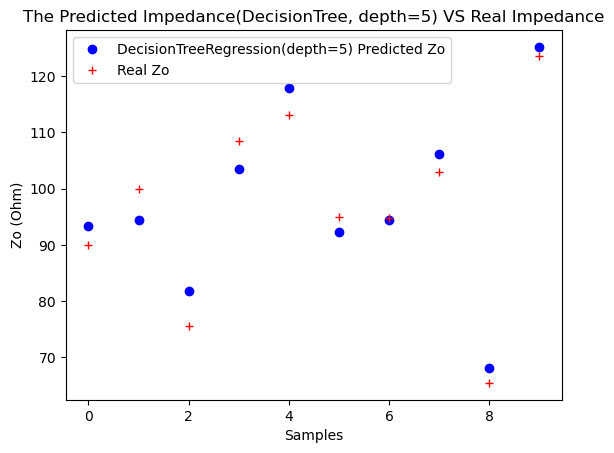

In [54]:
plt.plot(regr.predict(X_test)[0:10], 'bo', label = 'DecisionTreeRegression(depth=5) Predicted Zo')
plt.plot(y_test.to_numpy()[0:10], 'r+', label = 'Real Zo')
plt.xlabel('Samples')
plt.ylabel('Zo (Ohm)')
plt.title('The Predicted Impedance(DecisionTree, depth=5) VS Real Impedance')
plt.legend()
plt.show()

The max_depth=5 DecisionTreeRegression doesn't perform as good as LinearRegression. I tried to increase the max_depth.

In [55]:
regr = DecisionTreeRegressor(criterion='squared_error', max_depth = 10)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9984139839246156

In [56]:
mean_squared_error(regr.predict(X_test), y_test) 

0.4719431758199229

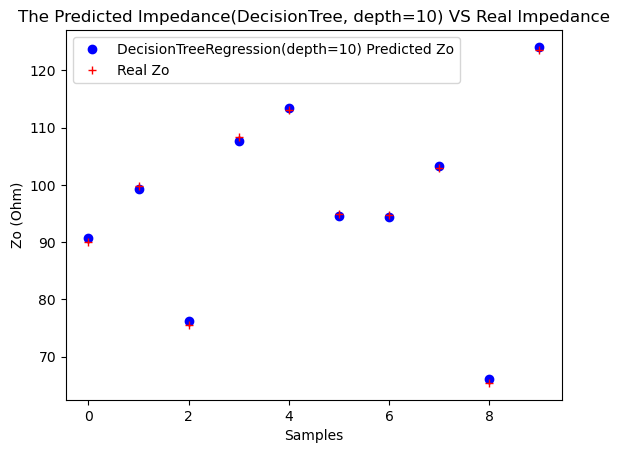

In [57]:
plt.plot(regr.predict(X_test)[0:10], 'bo', label = 'DecisionTreeRegression(depth=10) Predicted Zo')
plt.plot(y_test.to_numpy()[0:10], 'r+', label = 'Real Zo')
plt.xlabel('Samples')
plt.ylabel('Zo (Ohm)')
plt.title('The Predicted Impedance(DecisionTree, depth=10) VS Real Impedance')
plt.legend()
plt.show()

When increasing the depth of the DecisionTree, the accuracy of the model can be improved. In general, I think the Polynomial LinearRegression Model is good for this problem. As the PCB impedance might be able to be expressed by mathematical equations. 